# Part 1 : Supervised Learning

## 1. Import you data and perform basic data exploration phase
* Display general information about the dataset
* Create a pandas profiling reports to gain insights into the dataset
* Handle Missing and corrupted values
* Remove duplicates, if they exist
* Handle outliers, if they exist
* Encode categorical features

In [ ]:
# Import libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
# Import data

df = pd.read_csv("Microsoft_malware_dataset.csv", sep=",", on_bad_lines="skip")

<ipython-input-2-96c844c20bed>:3: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Microsoft_malware_dataset.csv", sep=",", on_bad_lines="skip")


### Display general information about the dataset

In [ ]:
df.head()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,NaN,53447.0,...,36144.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,10.0,0.0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,53447.0,...,57858.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,8.0,0.0
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,NaN,53447.0,...,52682.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,3.0,0.0
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,NaN,53447.0,...,20050.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,3.0,1.0
4,000014a5f00daa18e76b81417eeb99fc,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1379.0,0,7.0,0,NaN,53447.0,...,19844.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [ ]:
df.shape

(351836, 83)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351836 entries, 0 to 351835
Data columns (total 83 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   MachineIdentifier                                  351836 non-null  object 
 1   ProductName                                        351836 non-null  object 
 2   EngineVersion                                      351836 non-null  object 
 3   AppVersion                                         351836 non-null  object 
 4   AvSigVersion                                       351836 non-null  object 
 5   IsBeta                                             351836 non-null  int64  
 6   RtpStateBitfield                                   350515 non-null  float64
 7   IsSxsPassiveMode                                   351836 non-null  int64  
 8   DefaultBrowsersIdentifier                          16950 non-null   float6

In [ ]:
df.describe()

,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
count,351836.000000,350515.000000,351836.000000,16950.000000,350415.000000,350415.000000,350415.000000,351836.000000,351836.000000,339077.000000,...,345537.000000,351835.000000,128543.0,351210.000000,351835.000000,351835.000000,349024.000000,339784.000000,339784.000000,351835.000000
mean,0.000009,6.846463,0.017304,1656.029381,47873.140328,1.325260,1.021018,0.987753,108.037319,81290.029875,...,33031.138489,0.486018,0.0,0.006956,0.125621,0.037950,0.057102,0.282580,7.875394,0.500834
std,0.002920,1.021963,0.130400,1000.377710,13995.411679,0.521617,0.166705,0.109987,62.975510,48950.044622,...,21209.646635,0.499805,0.0,0.083112,0.331423,0.191075,0.232038,0.450254,4.550342,0.500000
min,0.000000,0.000000,0.000000,1.000000,39.000000,1.000000,0.000000,0.000000,1.000000,5.000000,...,5.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,7.000000,0.000000,788.000000,49480.000000,1.000000,1.000000,1.000000,51.000000,36825.000000,...,13168.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
50%,0.000000,7.000000,0.000000,1632.000000,53447.000000,1.000000,1.000000,1.000000,97.000000,82373.000000,...,33070.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000
75%,0.000000,7.000000,0.000000,2373.000000,53447.000000,2.000000,1.000000,1.000000,162.000000,123994.000000,...,52436.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,1.000000
max,1.000000,8.000000,1.000000,3204.000000,70486.000000,5.000000,4.000000,1.000000,222.000000,167962.000000,...,72091.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,1.000000


### Create a pandas profiling reports to gain insights into the dataset

In [ ]:
# Installing pandas profiling package
!pip install pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 15.8 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=e4fd708c50c39c1d9f6564bb85ffe8aa4fcac04970fc98c6413eb20fade1ab05
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
# importing the package we need
from pandas_profiling import ProfileReport

# Generating Profile Report
# Forming ProfileReport and save as output.html file
profile = ProfileReport(df)
profile.to_file("MMD_PP_OUTPUT.html")

profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Handle Missing and corrupted values

In [ ]:
# Features that contains more than 70% of null values
percent = (df.isnull().sum()/df.shape[0]) * 100

df_per = pd.DataFrame(data=percent, columns=['PercentofNullValues'])
df_per = df_per.sort_values(by='PercentofNullValues', ascending=False)

print(df_per.head(15))

                                       PercentofNullValues
PuaMode                                          99.974988
Census_ProcessorClass                            99.568549
DefaultBrowsersIdentifier                        95.182415
Census_IsFlightingInternal                       83.024477
Census_InternalBatteryType                       71.078002
Census_ThresholdOptIn                            63.552905
Census_IsWIMBootEnabled                          63.465080
SmartScreen                                      35.706409
OrganizationIdentifier                           30.810093
SMode                                             5.934299
CityIdentifier                                    3.626405
Wdft_IsGamer                                      3.425460
Wdft_RegionIdentifier                             3.425460
Census_InternalBatteryNumberOfCharges             3.040621
Census_FirmwareManufacturerIdentifier             2.052377


In [ ]:
# Removing features having 70 or more than 70 % of null values (5 features)
columns_to_be_removed = []

for col in df.columns:
    if percent.loc[col] >= 70:
        columns_to_be_removed.append(col)

df = df.drop(columns=columns_to_be_removed)

We will preprocess data according to the **types of features** from our dataset

In [ ]:
def types_of_features(data):
    '''
    Finding out numerical features, categorical features and binary features
    in a given dataset and storing them in a separate list
    '''
    total_features = data.columns
    numerical_features = list(data._get_numeric_data().columns)

    binary_features = []
    categorical_features = list(set(total_features) - set(numerical_features))
    for i in numerical_features:
        if (data[str(i)].min() == 0 and data[str(i)].max() == 1) and data[str(i)].min()== 0:

           binary_features.append(i)

    numerical_features = list(set(numerical_features)- set(binary_features))


    return numerical_features,binary_features,categorical_features

numerical_features, binary_features, categorical_features = types_of_features(df)

After figuring out different types of features in a given dataset and removing features having more than 70 percent of null values, there were still some features which had null values, so as a part of data preprocessing we have to **fill those missing values** and **clean categorical features** in order to reduce their high cardinalities.

--> Visualization of some categorical features using bar plots:

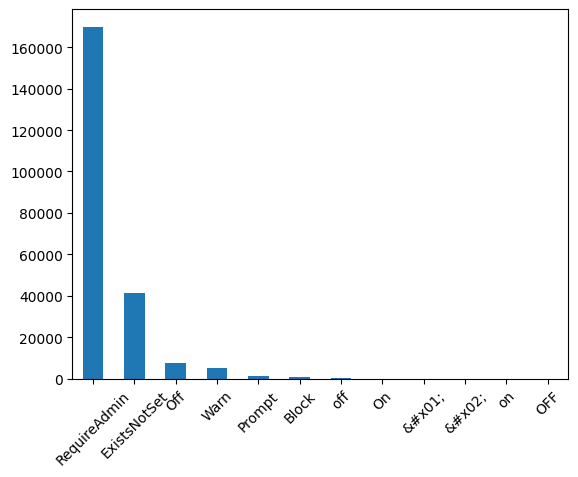

In [ ]:
df["SmartScreen"].value_counts(ascending=False).plot(kind="bar")
plt.xticks(rotation = 45);

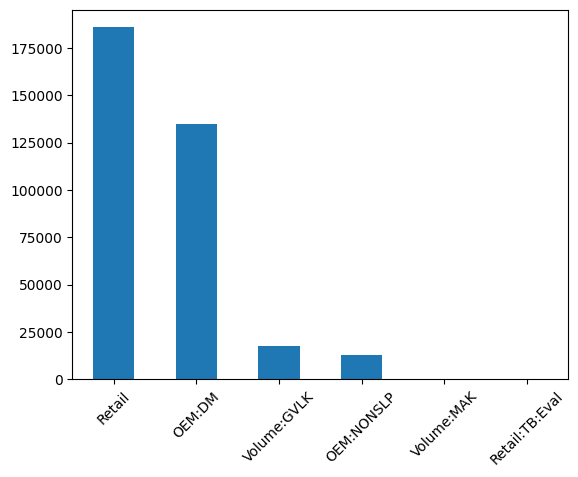

In [ ]:
df["Census_ActivationChannel"].value_counts(ascending=False).plot(kind="bar")
plt.xticks(rotation = 45);

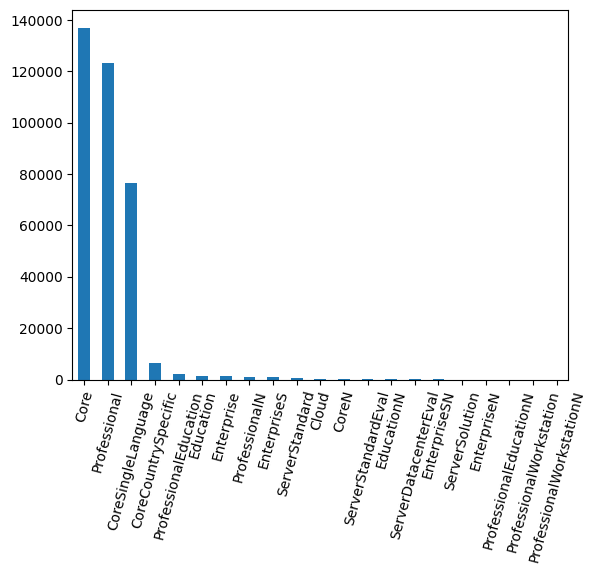

In [ ]:
df["Census_OSEdition"].value_counts(ascending=False).plot(kind="bar")
plt.xticks(rotation = 75);

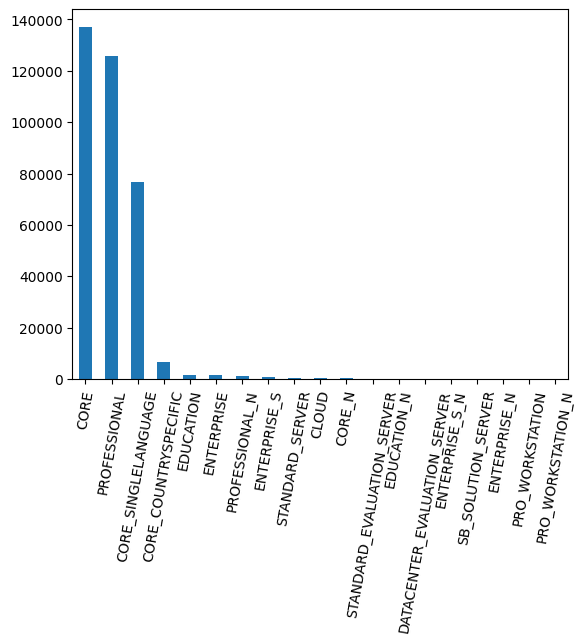

In [ ]:
df["Census_OSSkuName"].value_counts(ascending=False).plot(kind="bar")
plt.xticks(rotation = 80);

In [ ]:
df[categorical_features].dtypes

Census_PrimaryDiskTypeName            object
Census_PowerPlatformRoleName          object
MachineIdentifier                     object
AvSigVersion                          object
Census_OSInstallTypeName              object
Census_DeviceFamily                   object
Census_MDC2FormFactor                 object
SmartScreen                         category
Census_FlightRing                     object
SkuEdition                            object
OsPlatformSubRelease                  object
Census_OSBranch                       object
Census_OSArchitecture                 object
Census_OSSkuName                    category
Processor                             object
Census_OSWUAutoUpdateOptionsName      object
Census_OSEdition                    category
Census_ChassisTypeName                object
OsBuildLab                            object
AppVersion                            object
Platform                              object
OsVer                                 object
Census_OSV

In [ ]:
def replace_smartscreen(val):
    ''' cleaning category values to reduce number of categories for smartscreen feature '''
    val = str(val).lower()
    if val in 'block':
        return 'block'
    elif val in 'existnotset':
        return 'existnotset'
    elif val in 'off':
        return 'off'
    elif val in 'prompt':
        return 'prompt'
    elif val in 'requireadmin':
        return 'requireadmin'
    elif val in 'warn':
        return 'warn'
    elif val in 'on':
        return 'on'
    else:
        return 'unknown'

def replace_channel(val):
    ''' cleaning category values to reduce number of categories for activation channel'''
    val = str(val).lower()
    if 'oem' in val:
        return 'oem'
    elif 'retail' in val:
        return 'retail'
    elif 'volume' in val:
        return 'volume'
    else:
        return val

def replace_edition(val):
    ''' cleaning category values to reduce number of categories for os edition feature '''
    val = str(val).lower()
    if 'cloud' in val:
        return val
    elif 'core' in val:
        return 'core'
    elif 'education' in val:
        return 'education'
    elif 'enterprise' in val:
        return 'enterprise'
    elif 'pro' in val:
        return 'pro'
    elif 'server' in val:
        return 'server'
    elif 'home' in val:
        return 'home'
    else:
        return val

def replace_skuname(val):
    ''' cleaning category values to reduce number of categories  for os skuname'''
    val = str(val).lower()
    if 'cloud' in val:
        return 'cloud'
    elif 'core' in val:
        return 'core'
    elif 'education' in val:
        return 'education'
    elif 'enterprise' in val:
        return 'enterprise'
    elif 'pro' in val:
        return 'pro'
    elif 'server' in val:
        return 'server'
    elif 'home' in val:
        return 'home'
    else:
        return val

def fill_missing_values(data, features):
    '''
    Filling missing values and replacing not useful categories to unknown category
    '''
    numerical_features = features[0]
    binary_features = features[1]
    categorical_features = features[2]

    # replacing null values with -1 in in numerical features
    for feature in numerical_features:
        data[feature] = data[feature].fillna(-1)

    # replacing null values with mode value of that feature in binary features
    for feature in binary_features:
        data[feature] = data[feature].fillna(data[feature].mode()[0])

    data['SmartScreen'] = data['SmartScreen'].apply(replace_smartscreen)
    data['SmartScreen'] = data['SmartScreen'].astype('category')

    data['Census_OSSkuName'] = data['Census_OSSkuName'].apply(replace_skuname)
    data['Census_OSSkuName'] = data['Census_OSSkuName'].astype('category')

    data['Census_OSEdition'] = data['Census_OSEdition'].apply(replace_edition)
    data['Census_OSEdition'] = data['Census_OSEdition'].astype('category')

    data['Census_ActivationChannel'] = data['Census_ActivationChannel'].apply(replace_channel)
    data['Census_ActivationChannel'] = data['Census_ActivationChannel'].astype('category')

    data[categorical_features] = data[categorical_features].astype('category')

    data['Census_ChassisTypeName'].replace(['UNKNOWN','Unknown','Other'], 'unknown', inplace=True)
    data['Census_PowerPlatformRoleName'].replace(['UNKNOWN','Unspecified'], 'unknown', inplace=True)
    data['Census_FlightRing'].replace(['Invalid','Unknown'],'unknown',inplace=True)
    data['Census_OSSkuName'].replace(['UNDEFINED'],'unknown',inplace=True)
    data['SkuEdition'].replace(['Invalid'],'unknown',inplace=True)
    data['Census_OSWUAutoUpdateOptionsName'].replace(['UNKNOWN'],'unknown',inplace=True)
    data['Census_PrimaryDiskTypeName'].replace(['UNKNOWN','Unspecified'],'unknown',inplace=True)
    data['Census_GenuineStateName'].replace(['UNKNOWN'],'unknown',inplace=True)

    # replacing null values by adding category called 'unknown' in categorical features
    for feature in categorical_features:
        if 'unknown' not in data[feature].cat.categories:
            data[feature] = data[feature].cat.add_categories(['unknown'])
            data[feature] = data[feature].fillna('unknown')
        else:
            data[feature] = data[feature].fillna('unknown')

    return data

In [ ]:
df = fill_missing_values(data=df, features=types_of_features(df))
df.isnull().sum()

MachineIdentifier                          0
ProductName                                0
EngineVersion                              0
AppVersion                                 0
AvSigVersion                               0
                                          ..
Census_IsPenCapable                        0
Census_IsAlwaysOnAlwaysConnectedCapable    0
Wdft_IsGamer                               0
Wdft_RegionIdentifier                      0
HasDetections                              0
Length: 78, dtype: int64

In [ ]:
df.shape

(351836, 78)

In [ ]:
df.head()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,53447.0,1.0,...,36144.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,53447.0,1.0,...,57858.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,53447.0,1.0,...,52682.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,53447.0,1.0,...,20050.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0
4,000014a5f00daa18e76b81417eeb99fc,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1379.0,0,7.0,0,53447.0,1.0,...,19844.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


### Handle outliers, if they exist

We will remove outliers from our dataset based on Z- score method by selecting only the datapoints(rows) whose Z-score value is less than 3 because Z- score greater than 3 is considered as outliers. **Z- score describes any datapoint by finding their relationship with standard deviation and mean of the group of data points.**

In [ ]:
from scipy import stats

z = np.abs(stats.zscore(df[numerical_features]))
df = df[(z<3).all(axis=1)]

### Encode categorical features

There are various encoding techinques for encoding categorical features, but for this problem statement We will use **frequency encoding** for some features because its not feasible to use LabelEncoding techinque when cardinalities of categories in categorical features are very high and for some features we'll use **LabelEncoding** technique.



tqdm derives from the Arabic word taqaddum (تقدّم) which can mean "progress," and is an abbreviation for "I love you so much" in Spanish (te quiero demasiado).

Instantly make your loops show a smart progress meter - just wrap any iterable with tqdm(iterable), and you're done!

In [ ]:
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder

def frequency_encoding(feature, data):
    ''' Function to encode features based on frequency encoding'''

    encoded_dict = data[feature].value_counts().to_dict()
    return encoded_dict

thrsh = 8
frequency_encoded_features = [feat for feat in categorical_features if (df[feat].value_counts().sum() > thrsh)]
final_categorical_features = set(categorical_features) - set(frequency_encoded_features)

def encode_categorical_features(final_data, frequency_encoded_features, final_categorical_features):
    ''' encoding categorical features based on frequency encoding and label encoding'''

    for i in tqdm(frequency_encoded_features):
        encoded_values = frequency_encoding(i, final_data)
        final_data[i] = final_data[i].map(lambda x : encoded_values.get(str(x),0))
        final_data[i] = final_data[i].astype('int64')

    for i in tqdm(final_categorical_features):
        le = LabelEncoder()
        final_data[i] = le.fit_transform(final_data[i])
        final_data[i] = final_data[i].astype('int64')
    return final_data

df = encode_categorical_features(df, frequency_encoded_features, final_categorical_features)


  0%|          | 0/27 [00:00<?, ?it/s]<ipython-input-29-829d948bd93e>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data[i] = final_data[i].map(lambda x : encoded_values.get(str(x),0))
<ipython-input-29-829d948bd93e>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data[i] = final_data[i].astype('int64')
<ipython-input-29-829d948bd93e>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [ ]:
# Check the dataframe dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281294 entries, 0 to 351834
Data columns (total 78 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   MachineIdentifier                                  281294 non-null  int64  
 1   ProductName                                        281294 non-null  int64  
 2   EngineVersion                                      281294 non-null  int64  
 3   AppVersion                                         281294 non-null  int64  
 4   AvSigVersion                                       281294 non-null  int64  
 5   IsBeta                                             281294 non-null  int64  
 6   RtpStateBitfield                                   281294 non-null  float64
 7   IsSxsPassiveMode                                   281294 non-null  int64  
 8   AVProductStatesIdentifier                          281294 non-null  float6

## 2. Prepare your dataset for the modelling phase

First, we will reduce the amout of data for technical reasons..

In [ ]:
df_1 = df[:10000]
df_1.shape

(10000, 78)

In [ ]:
# Select target variable and features

target = "HasDetections"
y = df_1[target]
X = df_1.drop(columns=target)

X.shape, y.shape

((10000, 77), (10000,))

In [ ]:
# Split data into training and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, y_train.shape

((8000, 77), (8000,))

## 3. Apply Decision tree, and plot its ROC curve

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier()

# Define a parameter grid for grid search
grid_params = {
    'max_depth': [None, 10, 20, 30],  # Customize these hyperparameters as needed
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a K-Fold cross-validation object
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=clf, param_grid=grid_params, scoring='accuracy', cv=kfold)

# Perform grid search and cross-validation
grid_search.fit(X_train, y_train)

# Get the best parameters and estimator
best_params = grid_search.best_params_


# Print the best parameters
print("Best Parameters:", best_params)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}


In [ ]:
# Correct way to create a DecisionTreeClassifier with specific hyperparameters
clf_final = DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10)

clf_final.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10)

In [ ]:
y_probs = clf_final.predict_proba(X_test)[:, 1]
y_probs

array([0.66528354, 0.        , 0.07692308, ..., 0.22279793, 0.83333333,
       0.57954545])

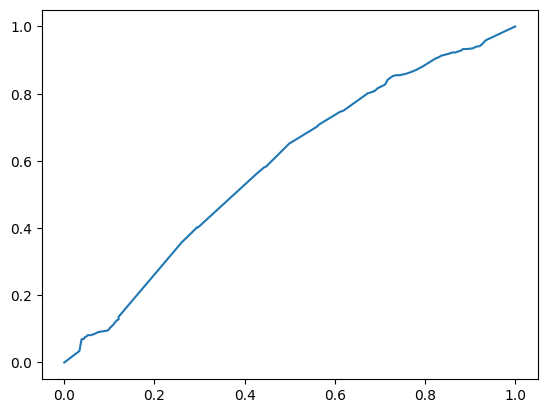

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities
y_probs = clf_final.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc})')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = clf_final.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(accuracy*100)

57.4


# Part 2 : Unsupervised Learning

In [ ]:
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score
from sklearn.model_selection import KFold

# Create a K-Means clustering model
kmeans = KMeans()

# Define a parameter grid for grid search
param_grid = {
    'n_clusters': [2, 3, 4, 5],  # Customize the number of clusters
    'init': ['k-means++', 'random'],
    'n_init': [10, 30, 50],
    'max_iter': [300, 500, 1000]
}

# Create a K-Fold cross-validation object
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Create a GridSearchCV object with 'silhouette' as the scoring metric
grid_search = GridSearchCV(estimator=kmeans, param_grid=param_grid, cv=kfold)

# Perform grid search and cross-validation
grid_search.fit(X)

# Get the best parameters and estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:", best_params)

# Fit the best estimator on the entire dataset
best_estimator.fit(X)

# Perform cluster assignment (labels_ will contain cluster assignments)
cluster_labels = best_estimator.labels_

# Calculate silhouette score
silhouette_avg = silhouette_score(X, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")

Best Parameters: {'init': 'k-means++', 'max_iter': 1000, 'n_clusters': 5, 'n_init': 50}
Silhouette Score: 0.37


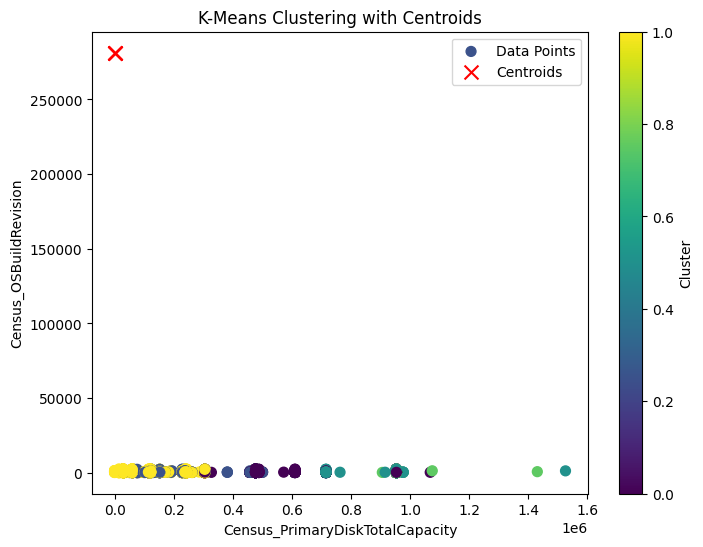

In [ ]:
# Create a K-Means clustering model with the optimal parameters
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=50, max_iter=1000)

# Fit the model to your data
kmeans.fit(X)

# Get the cluster assignments
cluster_labels = kmeans.labels_

# Create a new DataFrame to store the feature data and cluster labels
df_with_clusters = pd.DataFrame(X, columns=['Census_PrimaryDiskTotalCapacity', 'Census_OSBuildRevision'])

# Add the 'Cluster' column to your DataFrame
df_with_clusters['Cluster'] = cluster_labels

# Get the cluster centroids
centroids = kmeans.cluster_centers_

# Create a scatter plot to visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_with_clusters['Census_PrimaryDiskTotalCapacity'], df_with_clusters['Census_OSBuildRevision'], c=df_with_clusters['Cluster'], cmap='viridis', s=50, label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.xlabel('Census_PrimaryDiskTotalCapacity')
plt.ylabel('Census_OSBuildRevision')
plt.title('K-Means Clustering with Centroids')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()